In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA,KernelPCA

In [3]:
np.random.seed(0)
X,Y=make_circles(n_samples=400,noise=.05,factor=.3)

In [5]:
kpca=KernelPCA(kernel='rbf',fit_inverse_transform=True,gamma=10)
X_kpca=kpca.fit_transform(X)
X_i_t=kpca.inverse_transform(X_kpca)

In [6]:
pca=PCA()
X_pca=pca.fit_transform(X)

# Original Plot

In [8]:
plt.figure(figsize=(12,8))
red=Y==0
blue=Y==1


<Figure size 864x576 with 0 Axes>

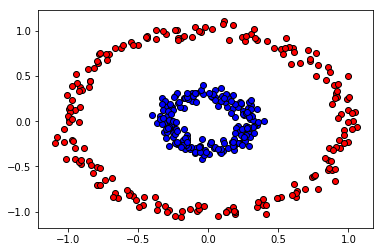

In [11]:
plt.scatter(X[red,0],X[red,1],c='red',edgecolor='k')
plt.scatter(X[blue,0],X[blue,1],c='blue',edgecolor='k')

PCA plot

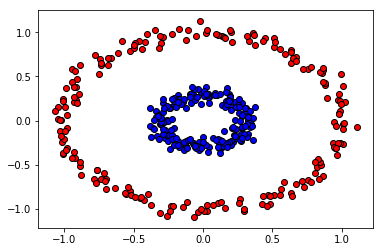

In [12]:
plt.scatter(X_pca[red,0],X_pca[red,1],c='red',edgecolor='k')
plt.scatter(X_pca[blue,0],X_pca[blue,1],c='blue',edgecolor='k')

# kernel plot

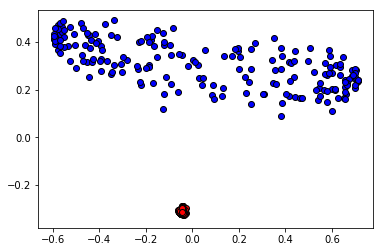

In [13]:
plt.scatter(X_kpca[red,0],X_kpca[red,1],c='red',edgecolor='k')
plt.scatter(X_kpca[blue,0],X_kpca[blue,1],c='blue',edgecolor='k')

# practical datset

In [14]:
df=sns.load_dataset('iris')

In [15]:
df=df[df['species']!='setosa']

In [16]:
col=['petal_length','petal_width']

In [18]:
X=df.loc[:,col]

In [19]:
species_to_num={
    'versicolor':0,
    'virginica':1
}
Y=df['species'].map(species_to_num)

In [25]:
kpca=KernelPCA(kernel='rbf',n_components=2)

In [26]:
X_kpca=kpca.fit_transform(X)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf=LogisticRegression()

In [29]:
clf.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = Y.min(), Y.max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

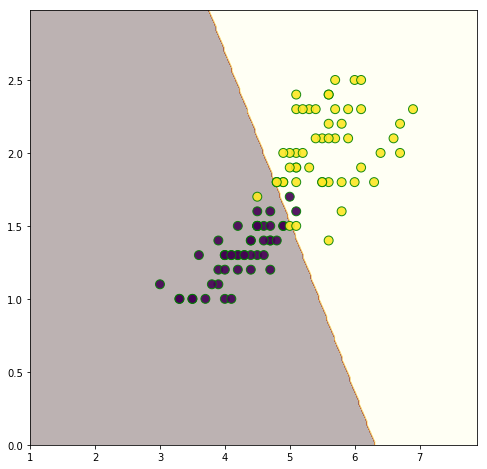

In [31]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,8))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=Y, s=80, 
            alpha=0.9, edgecolors='g');

In [32]:
clf.fit(X_kpca,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
Xv = X_kpca
h = 0.02
x_min, x_max = Xv.min()- 0.5, Xv.max() + 0.5
y_min, y_max = Y.min() - 0.5, Y.max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

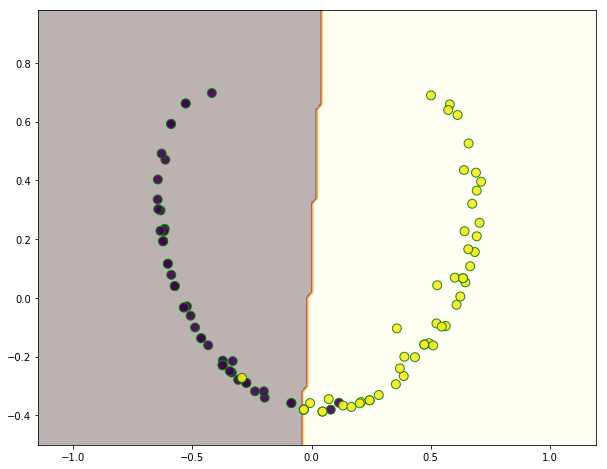

In [37]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(10,8))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=Y, s=80, 
            alpha=0.9, edgecolors='g');